<a href="https://colab.research.google.com/github/EltonGS/Bootcamp-Data-Science-Alura/blob/main/Bootcamp_Alura_Md1_Aula4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 1 do Bootcamp de Data Science Aplicada da Alura
## Aula 4 - Análise de gráficos e criação de hipóteses

## Neste módulo serão utilizados dados do Sistema Único de Saúde (**SUS**) que são disponibilizados através da plataforma **DATASUS**.

## Os dados extraídos são referentes aos gastos realizados por unidades da federação (estados e Distrito Federal) a partir de Janeiro de 2008 até Março de 2021.

## Utilizando o **Google Colab**, **Python** e a biblioteca **Pandas** os dados serão tratados para serem lidos corretamente. Gráficos serão criados utilizando a biblioteca **matplotlib** para simplificar a visualização e entendimento das informações.

In [2]:
# importando as bibliotecas Pandas e matplotlib 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


#encoding é usado para informar a padronização utilizada no arquivo
# thousands e decimal são utilizados para indicar qual o separador de milhar e casas decimais usado no arquivo
dados_atd = pd.read_csv('/content/atendimento.csv', encoding='ISO-8859-1', skiprows = 3, sep=';',
                    skipfooter = 12, thousands = '.', decimal = ',') 

# mostrar os números do tipo float com 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format

colunas_usaveis = dados_atd.mean().index.tolist() 
colunas_usaveis.insert(0, 'Unidade da Federação')
usaveis = dados_atd[colunas_usaveis]
usaveis = usaveis.set_index('Unidade da Federação')
usaveis = usaveis.drop(['Total', '2021/Jan', '2021/Fev', '2021/Mar'], axis = 1)

usaveis['Total'] =  usaveis.sum(axis=1)
ordenado_por_total = usaveis.sort_values('Total', ascending=False)
ordenado_por_total = ordenado_por_total.drop('Total', axis = 1)

# Na coluna 2008/Jan vemos um valor muito acima do padrão para os estados, isso traz uma distorção na visualização dos dados
# selecionando o nome das colunas a partir de 2008/Jan
colunas_interessadas = ordenado_por_total.columns[6:]

# atribuindo o valor do dataframe informando as colunas a partir de 2008/Jan
ordenado_por_total = ordenado_por_total[colunas_interessadas]

usaveis.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,977224099.12
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,443631609.94
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,1872327626.21
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2693726.29,2671451.53

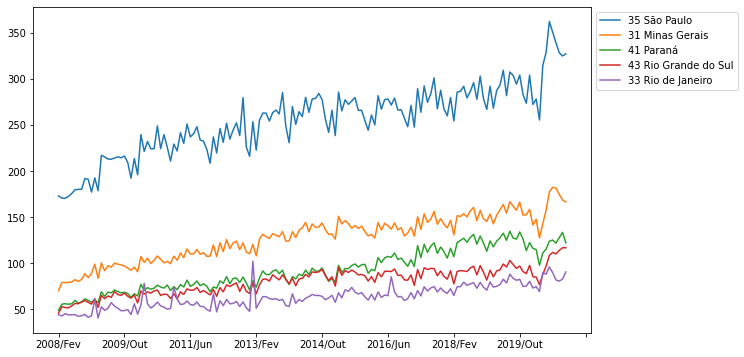

In [6]:
# dividingo por 1 milhão para que o eixo Y fique mais simples de ler
ordenado_por_total_milhoes = ordenado_por_total / 1000000

ordenado_por_total_milhoes.head(5).T.plot(figsize = (10, 6))
plt.legend(bbox_to_anchor = (1, 1))

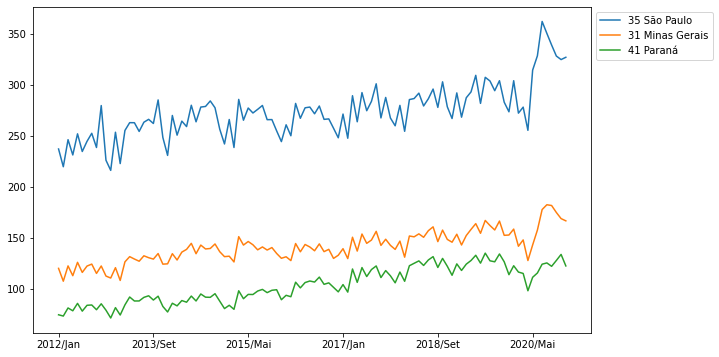

In [17]:
# separando pelo período de 2012 até o final de 2020
meses_filtrados = ordenado_por_total_milhoes.columns[47:]

ordenado_por_total_milhoes[meses_filtrados].head(3).T.plot(figsize = (10, 6))
plt.legend(bbox_to_anchor = (1, 1))

# é possível notar no gráfico que o eixo Y não inicia a partir do zero, distorcendo o gráfico visualmente

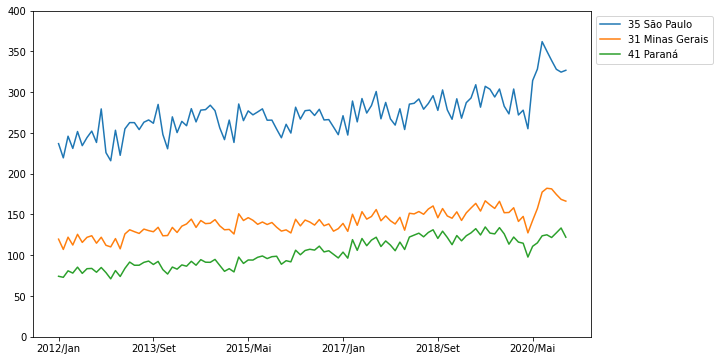

In [19]:
ordenado_por_total_milhoes[meses_filtrados].head(3).T.plot(figsize = (10, 6))

# definindo o valor mínimo e máximo da escala de Y, evitando assim distorções visuais
plt.ylim(0, 400)
plt.legend(bbox_to_anchor = (1, 1))

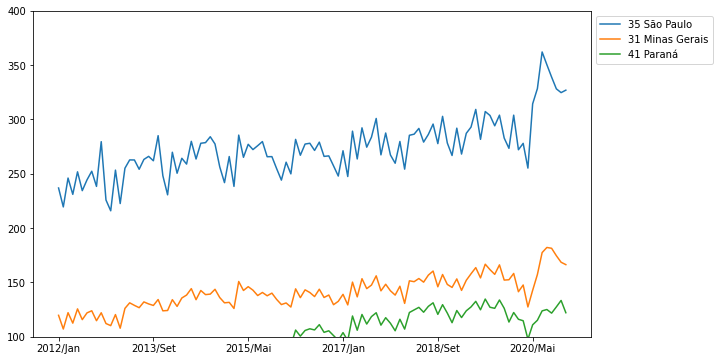

In [20]:
ordenado_por_total_milhoes[meses_filtrados].head(3).T.plot(figsize = (10, 6))

# definindo o valor inicial do eixo Y para 100, uma distorção visual ainda mais é causada
plt.ylim(100, 400)
plt.legend(bbox_to_anchor = (1, 1))

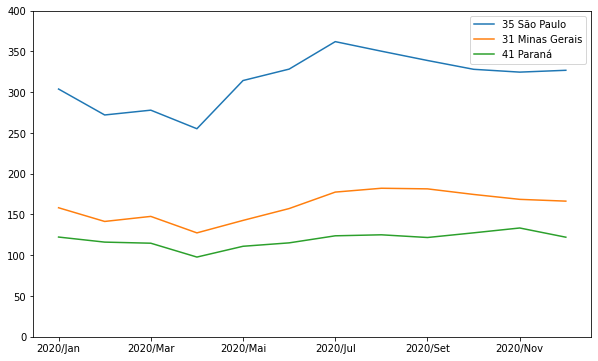

In [21]:
# colocando o valor da colunas como - 12: são selecionadas as últimas 12 colunas
ordenado_por_total_milhoes[ordenado_por_total_milhoes.columns[-12:]].head(3).T.plot(figsize = (10, 6))

plt.ylim(0, 400)
plt.legend(bbox_to_anchor = (1, 1))

# selecionando períodos específicos dentro de um dataset pode contar história mentirosas
# o gráfico abaixo pode ser interpretado como um aumento agressivo nos gastos, o que pode não ser verdade ao analisar o dataset todo

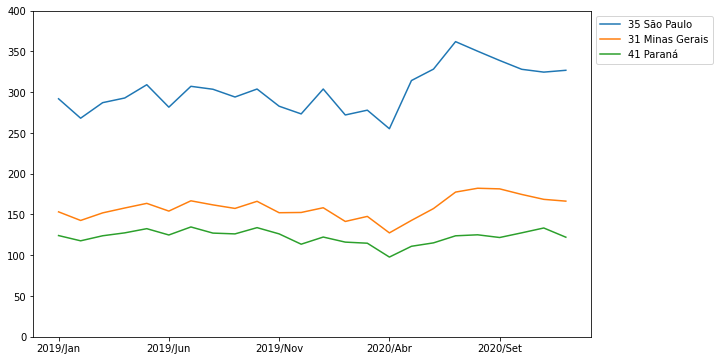

In [22]:
ordenado_por_total_milhoes[ordenado_por_total_milhoes.columns[-24:]].head(3).T.plot(figsize = (10, 6))

plt.ylim(0, 400)
plt.legend(bbox_to_anchor = (1, 1))

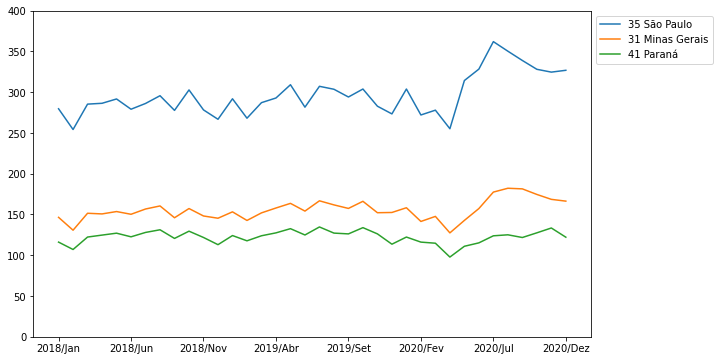

In [23]:
ordenado_por_total_milhoes[ordenado_por_total_milhoes.columns[-36:]].head(3).T.plot(figsize = (10, 6))

plt.ylim(0, 400)
plt.legend(bbox_to_anchor = (1, 1))

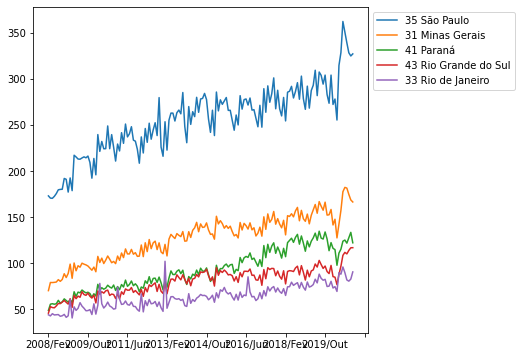

In [24]:
# alterando a escala do eixo X também podemos causar distorções visuais tornando a leitura mais difícil
ordenado_por_total_milhoes.head(5).T.plot(figsize = (6, 6))
plt.legend(bbox_to_anchor = (1, 1))

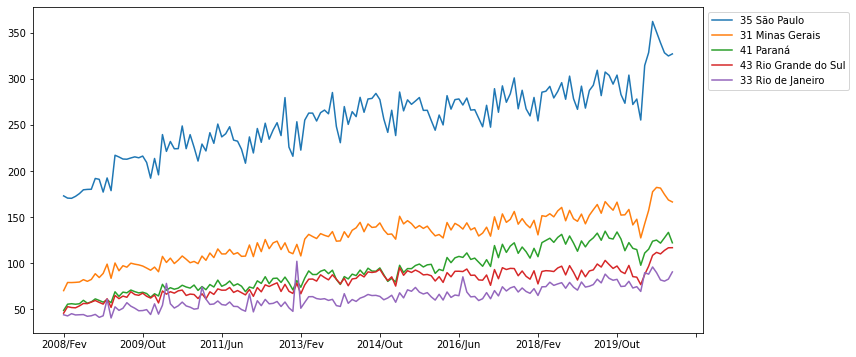

In [25]:
ordenado_por_total_milhoes.head(5).T.plot(figsize = (12, 6))
plt.legend(bbox_to_anchor = (1, 1))

# Desafio 01: Refaça as manipulações feitas em aulas e gaste um tempo analisando os dados e entendendo os efeitos das manipulações

(50.0, 350.0)

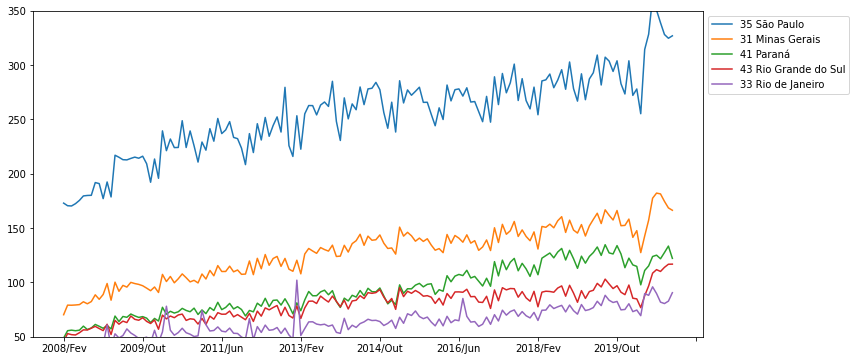

In [26]:
ordenado_por_total_milhoes.head(5).T.plot(figsize = (12, 6))
plt.legend(bbox_to_anchor = (1, 1))
plt.ylim(50, 350)

(50.0, 350.0)

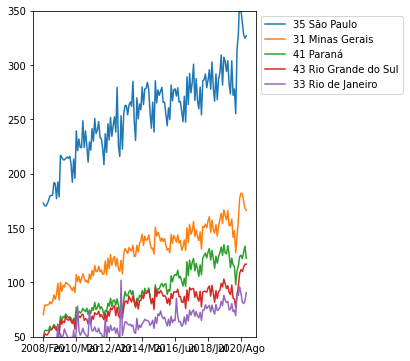

In [28]:
ordenado_por_total_milhoes.head(5).T.plot(figsize = (4, 6))
plt.legend(bbox_to_anchor = (1, 1))
plt.ylim(50, 350)

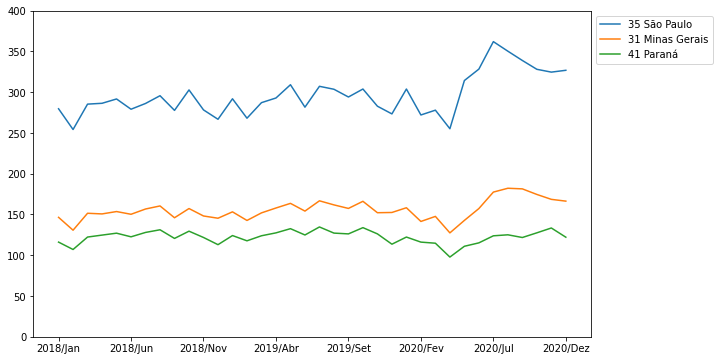

In [27]:
ordenado_por_total_milhoes[ordenado_por_total_milhoes.columns[-36:]].head(3).T.plot(figsize = (10, 6))

plt.ylim(0, 400)
plt.legend(bbox_to_anchor = (1, 1))

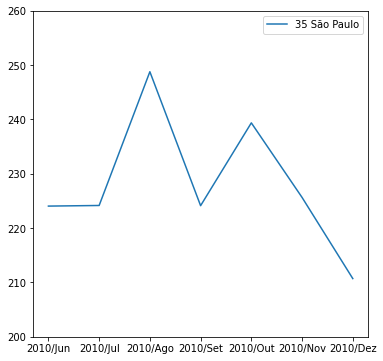

In [44]:
ordenado_por_total_milhoes[ordenado_por_total_milhoes.columns[28:35]].head(1).T.plot(figsize = (6, 6))

plt.ylim(200, 260)
plt.legend(bbox_to_anchor = (1, 1))

### A maneira como as escalas nos eixos X e Y, o tamanho do gráfico e os períodos escolhidos podem causar uma interpretação errada dos dados. Isso muitas vezes é utilizado intencionalmente para contar uma história desejada, que não seja a verdade.

### Devemos ter muito cuidado quando montamos um gráfico para não distorcer o que os dados contam. Sempre é necessário analisar as escalas, o tamanho do gráfico, onde os eixos X e Y iniciam.

### No último gráfico posso dizer que os gastos com o SUS em São Paulo tiveram um aumento em Agosto mas vem caindo bastante até dezembro, e passar a ideia que os gastos continuarão caindo. Sendo que analisando o dataset todo vemos que ano a ano os gastos vem aumentando.

#Desafio 02: Reflita sobre os problemas na manipulação de dados e discuta esse assunto no Discord.

### A manipulação de dados para contar uma história desejada é algo que vemos sempre, seja em publicidade, campanha política ou até mesmo nós ao querer provar alguma hipótese. Por isso é necessário todo cuidado ao transformar o que está nos dados em uma imagem. Os dados já possuem a sua história, nós estamos aqui para interpretar e demonstrar essa história.

### **Não devemos criar narrativas que não existem nos dados.**